In [1]:
from math import pi
import pandas as pd
from pykalman import KalmanFilter
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

__Открываем таблицу с данными__

In [2]:
df = pd.read_excel('TA9_sorted_light.xlsx')
d_before = df.copy()
d_before

,Time,TA09W,TA09Pin,TA09Pout,TA09Q,TA09Gh,TA09Gs,TA09Gr,TA09Gsw,TA09Th,TA09Ts,TA09Tsw
0,2017-12-31 01:00:00,34.434,131.21405,6.84004,18.743577,265.679934,231.907723,33.772210,213.47315,549.21429,239.981883,224.40297
1,2017-12-31 02:00:00,34.020,130.90822,6.70779,18.782844,261.809739,227.966777,33.842963,216.66152,547.08997,235.759720,223.29211
2,2017-12-31 03:00:00,33.969,131.16739,6.78159,19.137283,266.708087,232.226496,34.481591,221.24001,540.98462,233.732518,223.10010
3,2017-12-31 04:00:00,34.328,130.42202,6.73770,19.055169,259.383771,225.050134,34.333637,222.17330,550.27759,237.977532,222.36714
4,2017-12-31 05:00:00,34.378,131.64667,6.83037,19.630309,266.564516,231.194590,35.369926,226.78918,547.20074,235.784472,223.15752
...,...,...,...,...,...,...,...,...,...,...,...,...
5153,2019-12-30 16:00:00,18.169,133.13341,7.21561,11.061601,151.367907,131.328774,20.039133,206.97923,546.98516,265.926942,203.04305
5154,2019-12-30 17:00:00,16.819,132.86663,7.22018,11.048150,150.802323,130.787559,20.014765,207.06326,547.18646,266.784590,202.95640
5155,2019-12-30 18:00:00,15.452,134.32174,7.43184,10.735284,144.718132,125.270155,19.447977,205.76549,550.86074,273.782070,201.77242
5156,2019-12-30 19:00:00,15.307,135.71623,7.50078,10.306180,138.987365,120.316749,18.670616,204.71109,546.77781,276.968532,199.94500


__Инициализируем фильтр Калмана <br> Параметры стоят по умолчанию <br>__
__Для каждого параметра и перезаписываем фрейм <br>__
__Прогоняем столбец церез фильтр и выпрямляем его <br>
(по умолчанию kf.filter() возвращает array of tuple)__

In [3]:
for column in df.columns[1:]:
    kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = df[column][0],
                  initial_state_covariance = 0.1,
                  observation_covariance=0.1,
                  transition_covariance=.01)
    state_means,_ = kf.filter(df[column])
    state_means = state_means.flatten().round(2)
    df[column] = state_means

In [4]:
df

,Time,TA09W,TA09Pin,TA09Pout,TA09Q,TA09Gh,TA09Gs,TA09Gr,TA09Gsw,TA09Th,TA09Ts,TA09Tsw
0,2017-12-31 01:00:00,34.43,131.21,6.84,18.74,265.68,231.91,33.77,213.47,549.21,239.98,224.40
1,2017-12-31 02:00:00,34.28,131.10,6.79,18.76,264.23,230.43,33.80,214.67,548.42,238.40,223.99
2,2017-12-31 03:00:00,34.18,131.12,6.79,18.88,265.03,231.01,34.02,216.78,546.02,236.90,223.70
3,2017-12-31 04:00:00,34.22,130.91,6.77,18.93,263.35,229.24,34.11,218.38,547.29,237.22,223.31
4,2017-12-31 05:00:00,34.27,131.12,6.79,19.13,264.26,229.80,34.47,220.77,547.26,236.81,223.26
...,...,...,...,...,...,...,...,...,...,...,...,...
5153,2019-12-30 16:00:00,19.92,133.86,7.34,11.88,165.53,144.02,21.52,209.10,546.69,261.23,206.33
5154,2019-12-30 17:00:00,19.08,133.59,7.31,11.65,161.55,140.44,21.11,208.55,546.82,262.73,205.42
5155,2019-12-30 18:00:00,18.10,133.79,7.34,11.40,157.01,136.34,20.66,207.80,547.91,265.72,204.43
5156,2019-12-30 19:00:00,17.35,134.31,7.39,11.11,152.14,132.01,20.12,206.97,547.61,268.76,203.22


__Выводим данные для сверки до/после__

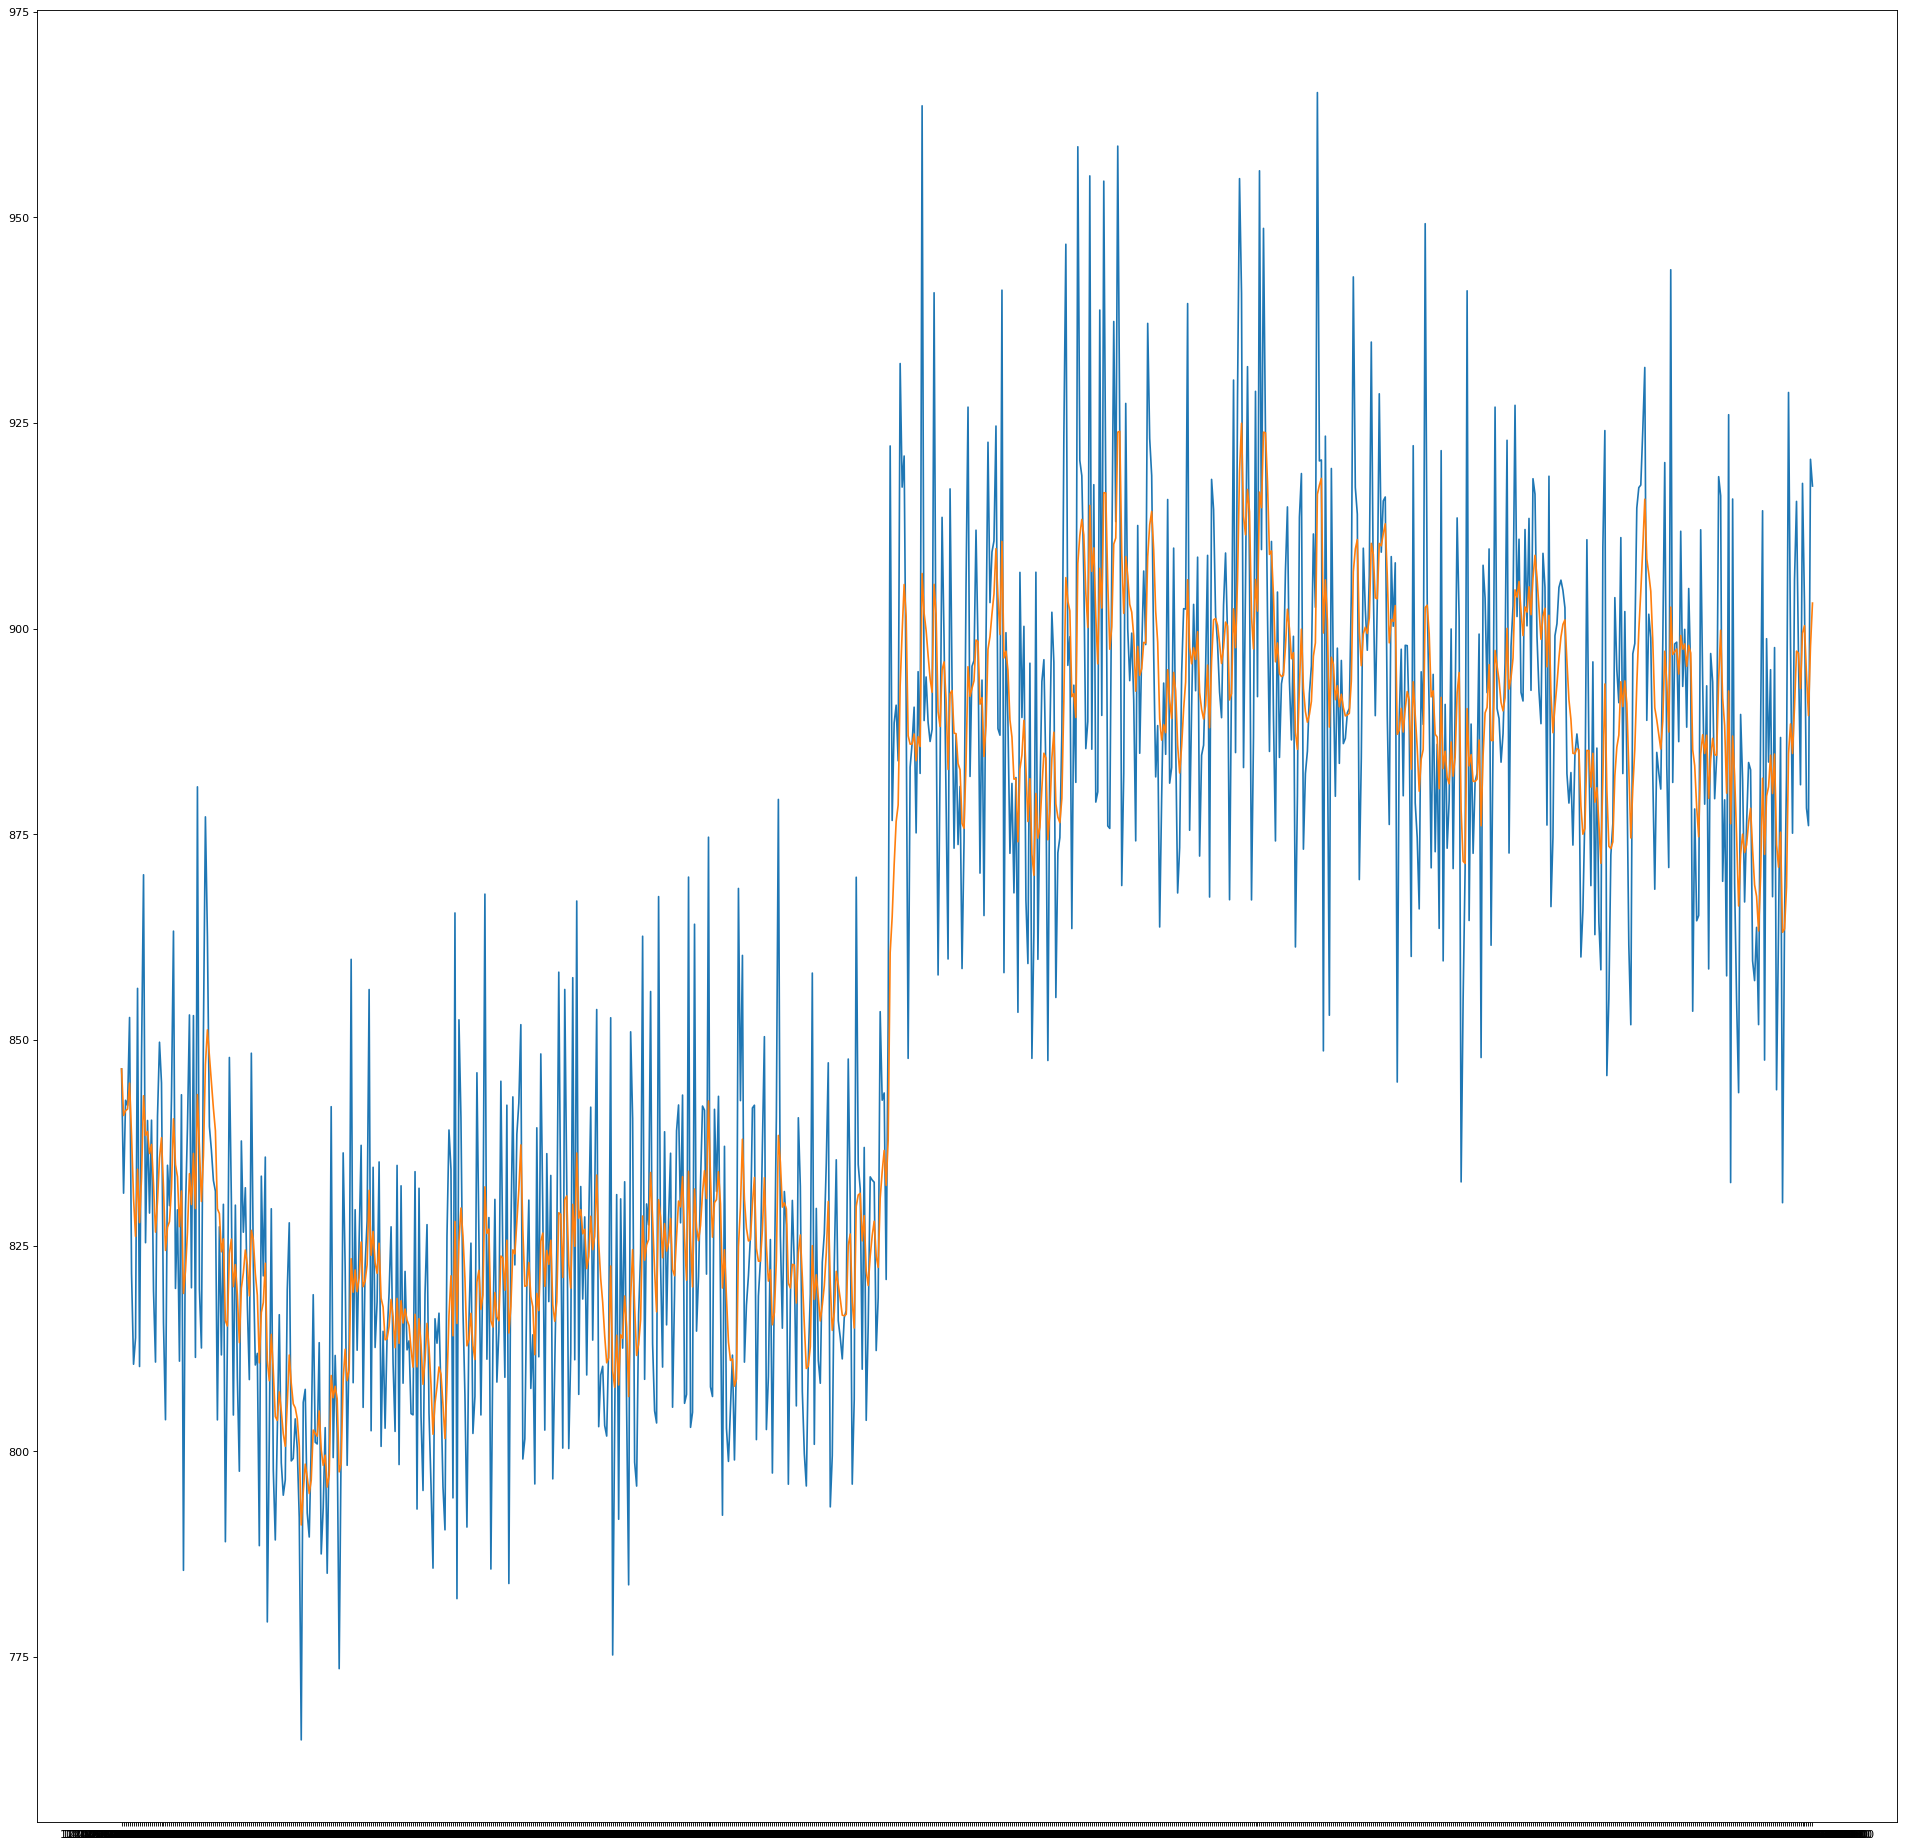

In [5]:
time = df['Дата - Время']
Gp2_values = d_before['Go2']
state_means = df['Go2']
figure(num=None, figsize=(30, 30), dpi=80, facecolor='w', edgecolor='k')

plt.plot(time,Gp2_values, label = 'values_before')
plt.plot(time,state_means, label = 'values_after')
#plt.legend()

In [5]:
df.to_excel('Kalman_TA9_sorted_light.xlsx', index=False)